# Week 10 - Implementation of Learning Algorithms
Prince Samuel S
RA1811027010099

In this experiment we are going to implement three Machine Learning Algorithms

1) Linear Regression
2) Support Vector Classififer
3) KNN

## I) Linear Regression
We are going to implement Linear Regression algorithm to predict students score using the given dataset -students-score.csv

### Linear Regression - Algorithm
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting

Formula- Y=Mx+C

where,
y is the target
x is the input data
M is the slope of the line
c is the error

In [1]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [2]:
sdata=pd.read_csv('student_scores.csv')
print("Data imported successfully\n")

print(sdata.shape)
print(sdata.head(10))

Data imported successfully

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


In [3]:
print(sdata.columns)
sdata.describe()

Index(['Hours', 'Scores'], dtype='object')


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


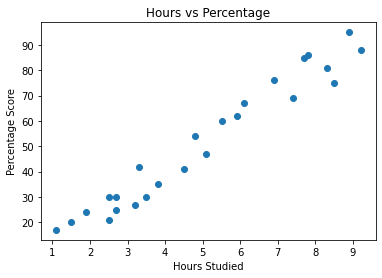

In [4]:
#Visualising the data
import matplotlib.pyplot as plt  
X=sdata['Hours']
Y=sdata['Scores']
plt.scatter(X, Y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [5]:
X = sdata.iloc[:, :-1].values  #Input
Y = sdata.iloc[:, 1].values  #Output

In [6]:
#Performing Train Test Validation
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [7]:
#Creating and fitting the linear Regression model with training data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


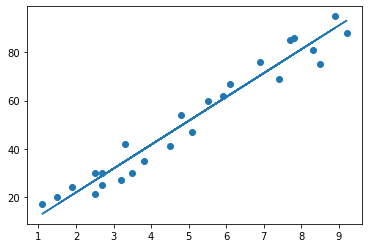

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [9]:
#Prediciting values for X_test
y_predict=regressor.predict(X_test)
y_predict=np.round(y_predict, decimals=2)
print(y_predict)

[16.88 33.73 75.36 26.79 60.49]


In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict,'Error':y_test-y_predict})  
df 

,Actual,Predicted,Error
0,20,16.88,3.12
1,27,33.73,-6.73
2,69,75.36,-6.36
3,30,26.79,3.21
4,62,60.49,1.51


In [11]:
#Validation of the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict)) #Find the mean Absolute error of the given model

Mean Absolute Error: 4.185999999999999


In [12]:
#Prediciting a student score where he studies for 9.5 hours
hours = [[9.5]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.5]]
Predicted Score = 96.16939660753593


# 2) Support Vector Classifier

Implementation of Support Vector Classification algorithm to classify the cases of breast cancer using the given dataset.

## Support Vector Classifier - Algorithm

“Support Vector Machine” (SVM) is a machine learning algorithm which is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space with the value of each feature. Then, we perform classification by finding the hyper-plane that differentiates the two or more classes very well 

In [13]:
#Importing the breast cancer dataset
cdata=pd.read_csv('brest cancer data.csv');
cdata=cdata.drop('Unnamed: 32',axis=1)
cdata.replace({'diagnosis':{'M': 0,'B': 1}},inplace=True)

print(cdata.shape)
print(cdata.columns)
cdata.describe()

(569, 32)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

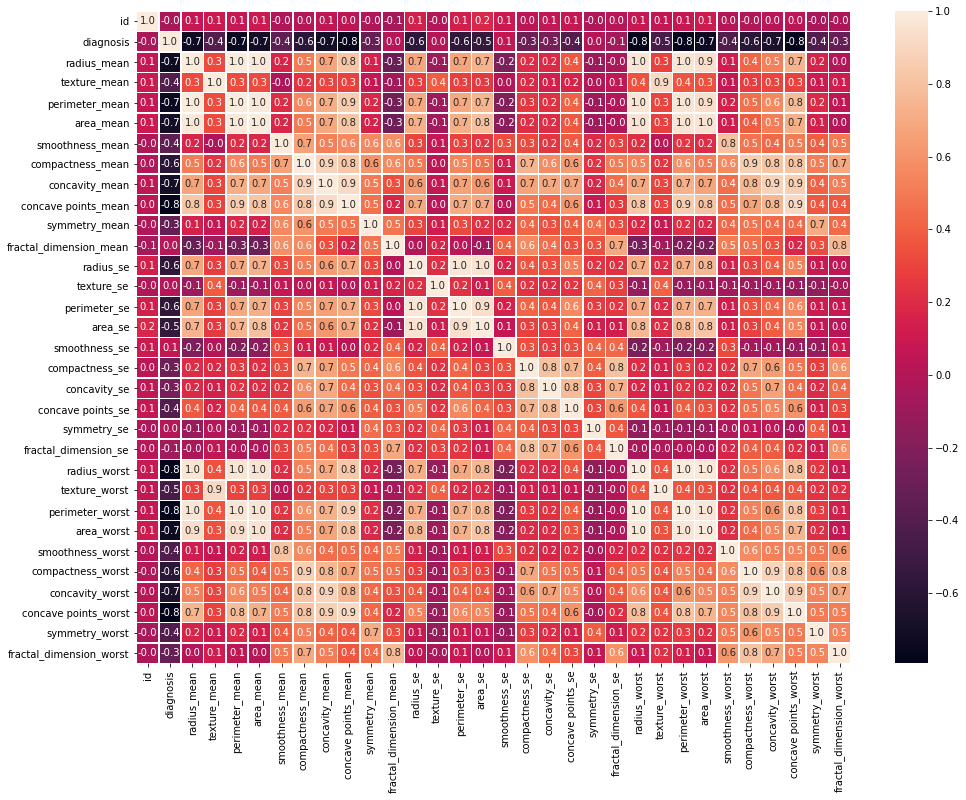

In [14]:
# Visualising the corelation betweeen various factors
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = cdata.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cdata.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)

In [15]:
#Splitting train and test validation data

X = cdata.drop('diagnosis', axis=1)
Y = cdata['diagnosis']

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 0)

In [16]:
X_train.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,897880,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,90745,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,905189,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,86211,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,91376701,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


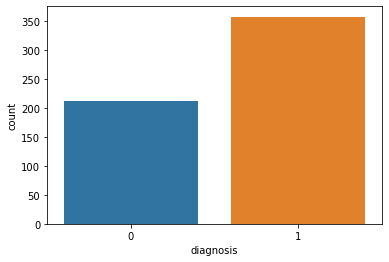

In [17]:
#Plotting the count in diagnosis
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=Y)
plt.show()

In [18]:
# Scaling the data usinng Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.23317811, -1.15036482, -0.39064196, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.23991409, -0.93798972,  0.68051405, ..., -0.60687023,
         0.09669004, -0.38615797],
       [-0.23311711,  0.574121  , -1.03333557, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [ 7.27895613, -1.32422924, -0.20048168, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-0.23336823, -1.24380987, -0.2245526 , ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.23294935, -0.73694129,  1.14989702, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [20]:
from sklearn.svm import SVC

#Function for storing model scores using various kernals
svc_scores = []
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
for type in kernel_type:
    svc_classifier = SVC(kernel = type)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

<BarContainer object of 4 artists>

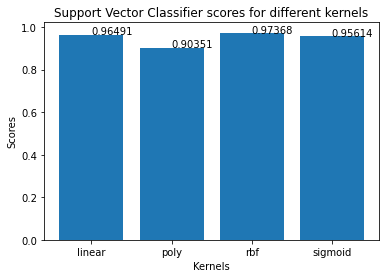

In [21]:
for i in range(len(kernel_type)):
    label = round(svc_scores[i], 5)
    plt.text(i, svc_scores[i], label)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.bar(kernel_type, svc_scores)

In [22]:
# From the above we can see that the Poly Kernel gives the maximum output. So using that kernel to train the data
SVCmodel = SVC(kernel='rbf')
SVCmodel.fit(X_train, y_train)


SVC()

In [23]:
SVC_predicted = SVCmodel.predict(X_test)

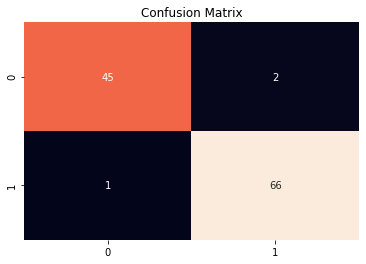

Accuracy 0.9736842105263158


In [24]:
# Plotting the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score

conmat = confusion_matrix(y_test, SVC_predicted)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix") # Confusion matrix is used to find the true positive, negative and false positive and negatice
plt.show()

svc_acc_score = accuracy_score(y_test, SVC_predicted)
print("Accuracy",svc_acc_score) # Accuracy of the model is caculated



# K-Means Clustering

Implementation of K-means clustering algorithm to group the customers based on their demographic detail using the given dataset.


K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

In [25]:
#Loading the customer data
mdata=pd.read_csv('Mall_Customers.csv')
mdata.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


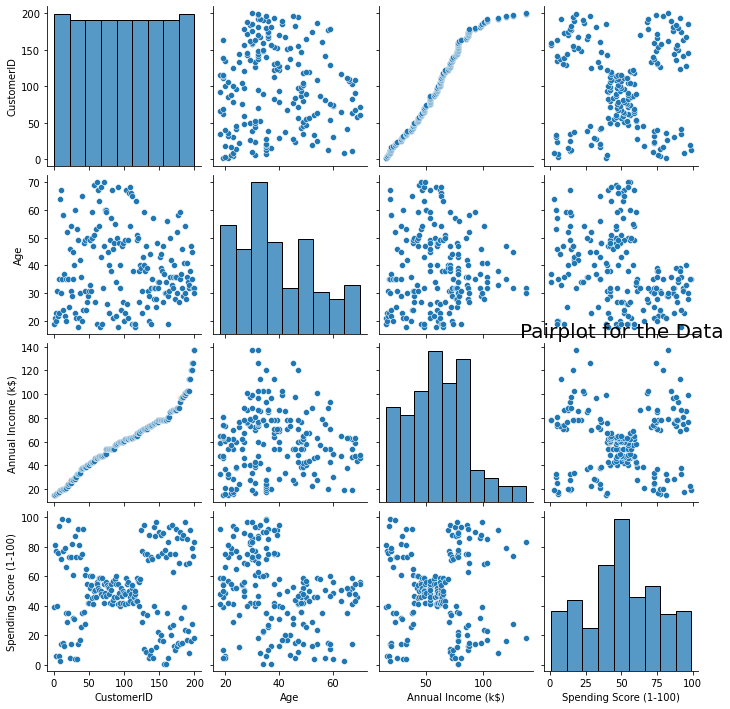

In [26]:
# Using pair plot to visualise the data
sns.pairplot(mdata)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

### Using Annual Income and Spending scores to Cluster the customers

In [27]:
x = mdata.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)
print(x[1:10])

(200, 2)
[[15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


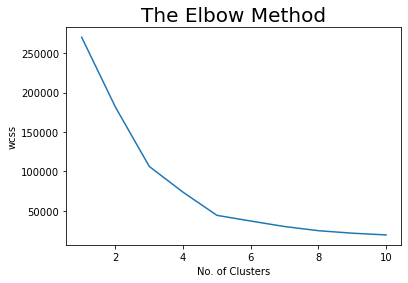

In [28]:
from sklearn.cluster import KMeans

#Using the famous elbow technique to find the optimum number of clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

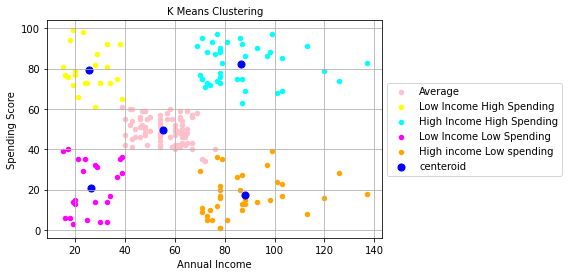

In [29]:
#Using the number of clusters as 5
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Plotting the diagram
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 20, c = 'pink', label = 'Average')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 20, c = 'yellow', label = 'Low Income High Spending')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 20, c = 'cyan', label = 'High Income High Spending')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 20, c = 'magenta', label = 'Low Income Low Spending')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 20, c = 'orange', label = 'High income Low spending')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')


plt.title('K Means Clustering', fontsize = 10)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()


### Using Age and Spending Scores to Cluster the customers

In [30]:
x = mdata.iloc[:, [2, 4]].values

# let's check the shape of x
print(x.shape)
print(x[0:10])

(200, 2)
[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]]


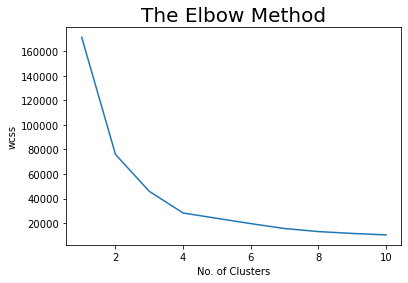

In [31]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

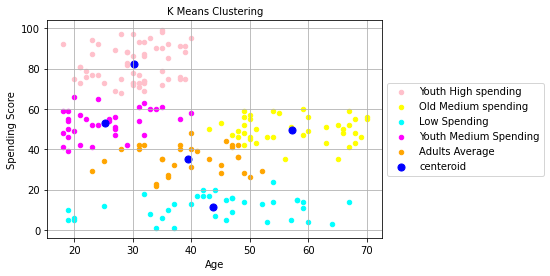

In [32]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 20, c = 'pink', label = 'Youth High spending')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 20, c = 'yellow', label = 'Old Medium spending')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 20, c = 'cyan', label = 'Low Spending')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 20, c = 'magenta', label = 'Youth Medium Spending')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 20, c = 'orange', label = 'Adults Average')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')


plt.title('K Means Clustering', fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()


# Results
The learning models are successfully run on the given models